In [13]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('BigMartTrain.csv')
test=pd.read_csv('BigMartTest.csv')

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

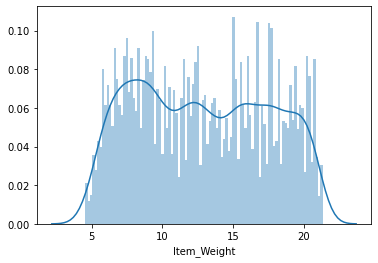

In [15]:
sns.distplot(df['Item_Weight'],bins=100)

In [20]:
df[df['Item_Weight']==np.NaN]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [21]:
df['Item_Weight'].fillna(0,inplace=True)

In [23]:
df[df['Item_Weight']==0].index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [24]:
ind=df[df['Item_Weight']==0].index

In [25]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
for i in ind:
    it=df.iloc[i,0]
    df.iloc[i,1]=np.mean(df[df['Item_Identifier']==it]['Item_Weight'])

In [50]:
df[df['Item_Weight']==0].index

Int64Index([927, 1922, 4187, 5022], dtype='int64')

In [51]:
ind=df[df['Item_Weight']==0].index

In [53]:
df['Item_Weight'].replace(0,np.mean(df['Item_Weight']),inplace=True)

In [27]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

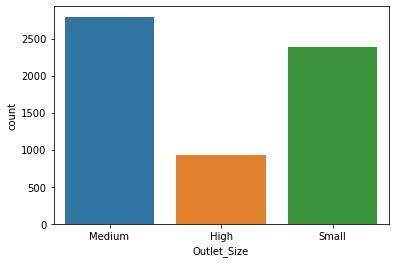

In [28]:
sns.countplot(df['Outlet_Size'])

In [29]:
df['Outlet_Size'].fillna('Missing',inplace=True)

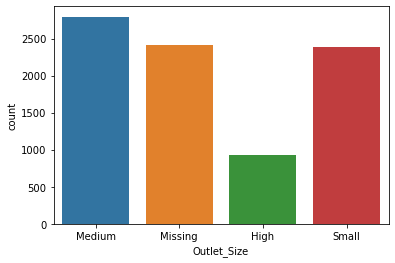

In [30]:
sns.countplot(df['Outlet_Size'])

In [31]:
df['Outlet_Size'].replace('Missing','Small',inplace=True)

In [34]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [35]:
test.shape

(5681, 11)

In [36]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [37]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [38]:
test['Item_Weight'].fillna(0,inplace=True)

In [48]:
ind=test[test['Item_Weight']==0].index

In [42]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [43]:
for i in ind:
    it=test.iloc[i,0]
    test.iloc[i,1]=np.mean(test[test['Item_Identifier']==it]['Item_Weight'])

In [55]:
ind=test[test['Item_Weight']==0].index

In [57]:
test['Item_Weight'].replace(0,np.mean(test['Item_Weight']),inplace=True)

In [44]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [45]:
test['Outlet_Size'].fillna('Small',inplace=True)

In [47]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [59]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
df['Item_Identifier'].value_counts(normalize=True)*100

FDW13    0.117330
FDG33    0.117330
DRN47    0.105597
DRE49    0.105597
FDV38    0.105597
           ...   
FDK57    0.011733
FDE52    0.011733
FDC23    0.011733
FDQ60    0.011733
DRF48    0.011733
Name: Item_Identifier, Length: 1559, dtype: float64

In [64]:
df['Item_category']=df['Item_Identifier'].str[:2]

In [66]:
test['Item_category']=test['Item_Identifier'].str[:2]

In [109]:
df['new_item']=df['Item_Identifier'].str[-2:].astype('int')

In [110]:
test['new_item']=test['Item_Identifier'].str[-2:].astype('int')

In [68]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [69]:
df['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['LF','REG','LF','REG','LF'],inplace=True)

In [70]:
df['Item_Fat_Content'].value_counts()

LF     5517
REG    3006
Name: Item_Fat_Content, dtype: int64

In [71]:
test['Item_Fat_Content'].replace(['Low Fat','Regular','LF','reg','low fat'],['LF','REG','LF','REG','LF'],inplace=True)

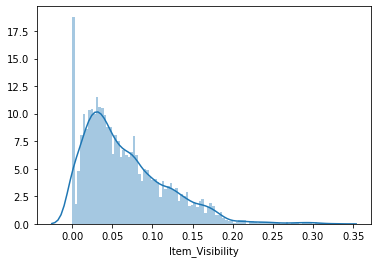

In [74]:
sns.distplot(df['Item_Visibility'],bins=100)

In [76]:
df[df['Item_Visibility']==0].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category
3,FDX07,19.200,REG,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,LF,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
5,FDP36,10.395,REG,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD
10,FDY07,11.800,LF,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,FD
32,FDP33,18.700,LF,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,FD


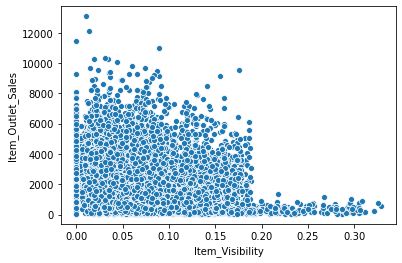

In [78]:
sns.scatterplot(df['Item_Visibility'],df['Item_Outlet_Sales'])

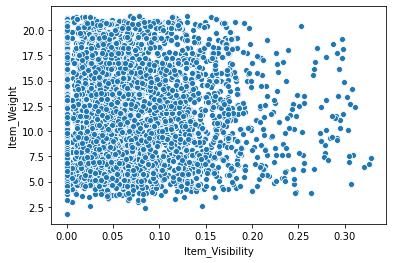

In [79]:
sns.scatterplot(df['Item_Visibility'],df['Item_Weight'])

In [82]:
ind=df[df['Item_Visibility']==0].index

In [83]:
for i in ind:
    it=df.iloc[i,1]
    df.iloc[i,3]=np.mean(df[df['Item_Weight']==it]['Item_Visibility'])

In [84]:
ind=test[test['Item_Visibility']==0].index

In [86]:
for i in ind:
    it=test.iloc[i,1]
    test.iloc[i,3]=np.mean(test[test['Item_Weight']==it]['Item_Visibility'])

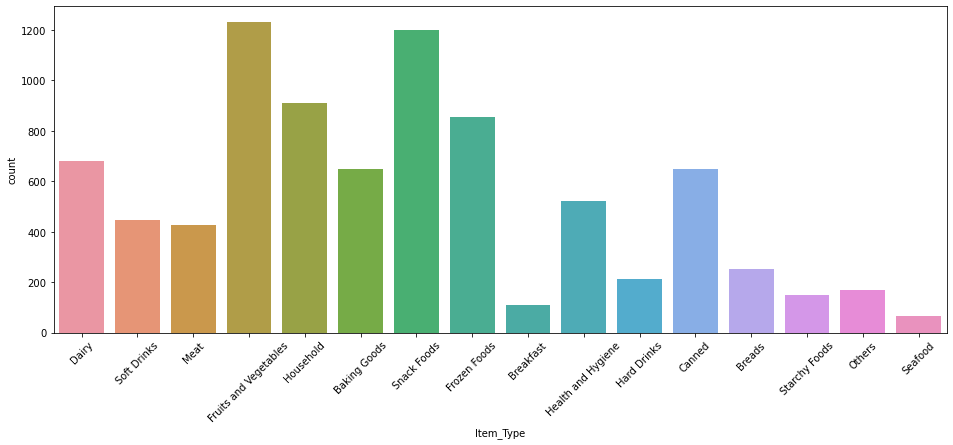

In [93]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Item_Type'])

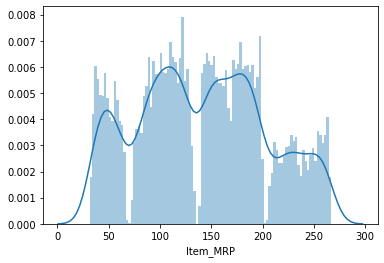

In [95]:
sns.distplot(df['Item_MRP'],bins=100)

In [96]:
def hello(s):
    if s<=67.5:
        return 0
    elif (s>67.5) & (s<=134.5):
        return 1
    elif (s>134.5) & (s<=201.1):
        return 2
    else:
        return 3
    

In [97]:
df['MRP_bins']=df['Item_MRP'].apply(hello)

In [98]:
test['MRP_bins']=test['Item_MRP'].apply(hello)

In [100]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,MRP_bins
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,3
1,DRC01,5.92,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,0
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,2
3,FDX07,19.20,REG,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,2
4,NCD19,8.93,LF,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,0


In [101]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [105]:
df['new_out']=df['Outlet_Identifier'].str.split('0').str.get(1).astype('int')

In [106]:
test['new_out']=test['Outlet_Identifier'].str.split('0').str.get(1).astype('int')

In [112]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,MRP_bins,new_out,new_item
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,3,49,15
1,DRC01,5.92,REG,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,0,18,1
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,2,49,15
3,FDX07,19.20,REG,0.073084,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,2,1,7
4,NCD19,8.93,LF,0.018274,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,0,13,19


In [113]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [117]:
df['total']=2013-df['Outlet_Establishment_Year']

In [118]:
test['total']=2013-test['Outlet_Establishment_Year']

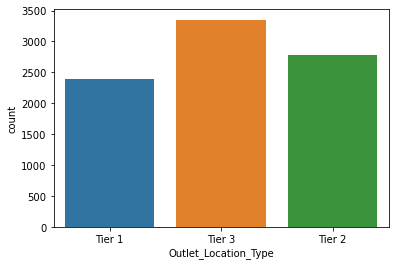

In [121]:
sns.countplot(df['Outlet_Location_Type'])

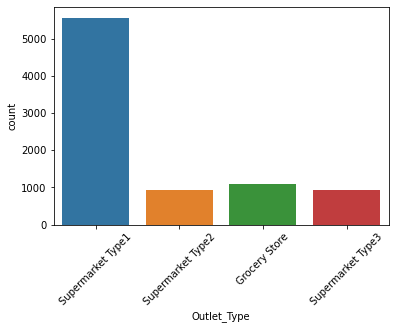

In [125]:
plt.xticks(rotation=45)
sns.countplot(df['Outlet_Type'])

In [131]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()

In [135]:
for col in df.columns[df.dtypes=='object'].drop('Item_Identifier','Outlet_Identifier'):
    df[col]=ll.fit_transform(df[col])

In [140]:
for col in test.columns[test.dtypes=='object'].drop('Item_Identifier','Outlet_Identifier'):
    test[col]=ll.fit_transform(test[col])

In [142]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_category,MRP_bins,new_out,new_item,total
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,3,49,15,14
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,0,18,1,4
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,2,49,15,14
3,FDX07,19.200,1,0.073084,6,182.0950,0,1998,2,2,0,732.3800,1,2,1,7,15
4,NCD19,8.930,0,0.018274,9,53.8614,1,1987,0,2,1,994.7052,2,0,13,19,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1,3,13,22,26
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850,1,1,45,36,11
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2,1,35,29,9
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1,1,18,46,4


In [145]:
df.groupby(['new_out'])['Item_Outlet_Sales'].mean().sort_values()

new_out
1      339.351662
19     340.329723
18    1995.498739
45    2192.384798
46    2277.844267
13    2298.995256
17    2340.675263
49    2348.354635
35    2438.841866
27    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [146]:
def hello(s):
    if s in [1,19]:
        return 1
    else:
        return s

In [147]:
df['new_out']=df['new_out'].apply(hello)

In [148]:
test['new_out']=test['new_out'].apply(hello)

In [149]:
model=lgb.LGBMRegressor(max_depth=20,n_estimators=100)

In [150]:
gg=GradientBoostingRegressor(n_estimators=700, min_samples_leaf=55)

In [151]:
ex=ExtraTreesRegressor(n_estimators=700,max_depth=6,min_samples_split=28, min_samples_leaf=50,n_jobs=-1)

In [152]:
final=VotingRegressor([('a',model),('c',ex),('b',gg)],weights=[1,1,2])

In [153]:
final.fit(df.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1),(df['Item_Outlet_Sales']))

VotingRegressor(estimators=[('a', LGBMRegressor(max_depth=20)),
                            ('c',
                             ExtraTreesRegressor(max_depth=6,
                                                 min_samples_leaf=50,
                                                 min_samples_split=28,
                                                 n_estimators=700, n_jobs=-1)),
                            ('b',
                             GradientBoostingRegressor(min_samples_leaf=55,
                                                       n_estimators=700))],
                weights=[1, 1, 2])

In [154]:
pred=final.predict(test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1))
pred=(abs(pred))

In [167]:
a=test[['Item_Identifier','Outlet_Identifier']]
b=pd.DataFrame(pred).rename(columns={0:'Item_Outlet_Sales'})

In [168]:
pd.concat([a,b],axis=1).to_csv('hack.csv',index=False)